In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
data=pd.read_csv('LoansData.csv')
data.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2499 non-null   float64
 1   Amount.Funded.By.Investors      2499 non-null   float64
 2   Interest.Rate                   2498 non-null   object 
 3   Loan.Length                     2500 non-null   object 
 4   Loan.Purpose                    2500 non-null   object 
 5   Debt.To.Income.Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home.Ownership                  2499 non-null   object 
 8   Monthly.Income                  2499 non-null   float64
 9   FICO.Range                      2498 non-null   object 
 10  Open.CREDIT.Lines               2497 non-null   float64
 11  Revolving.CREDIT.Balance        2497 non-null   float64
 12  Inquiries.in.the.Last.6.Months  24

In [61]:
data.columns = data.columns.str.replace('.', '_', regex=True)

In [62]:
data.columns

Index(['Amount_Requested', 'Amount_Funded_By_Investors', 'Interest_Rate',
       'Loan_Length', 'Loan_Purpose', 'Debt_To_Income_Ratio', 'State',
       'Home_Ownership', 'Monthly_Income', 'FICO_Range', 'Open_CREDIT_Lines',
       'Revolving_CREDIT_Balance', 'Inquiries_in_the_Last_6_Months',
       'Employment_Length'],
      dtype='object')

In [63]:
data.duplicated().sum()

0

In [64]:
data.isna().sum()

Amount_Requested                   1
Amount_Funded_By_Investors         1
Interest_Rate                      2
Loan_Length                        0
Loan_Purpose                       0
Debt_To_Income_Ratio               1
State                              0
Home_Ownership                     1
Monthly_Income                     1
FICO_Range                         2
Open_CREDIT_Lines                  3
Revolving_CREDIT_Balance           3
Inquiries_in_the_Last_6_Months     3
Employment_Length                 77
dtype: int64

In [65]:
num_cols = ['Amount_Requested', 'Amount_Funded_By_Investors', 'Interest_Rate', 
            'Debt_To_Income_Ratio', 'Monthly_Income', 'Open_CREDIT_Lines', 
            'Revolving_CREDIT_Balance', 'Inquiries_in_the_Last_6_Months']



data[num_cols] = data[num_cols].apply(lambda x: x.fillna(x.mean()) if x.dtype in ['int64', 'float64'] else x)



In [66]:
cat_cols = ['Home_Ownership', 'FICO_Range', 'Employment_Length']


for col in cat_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

In [67]:
data.isna().sum()

Amount_Requested                  0
Amount_Funded_By_Investors        0
Interest_Rate                     2
Loan_Length                       0
Loan_Purpose                      0
Debt_To_Income_Ratio              1
State                             0
Home_Ownership                    0
Monthly_Income                    0
FICO_Range                        0
Open_CREDIT_Lines                 0
Revolving_CREDIT_Balance          0
Inquiries_in_the_Last_6_Months    0
Employment_Length                 0
dtype: int64

In [71]:
data = data.dropna(subset=['Interest_Rate', 'Debt_To_Income_Ratio'])

In [72]:
data = data.copy()

In [80]:
# Remove percentage signs and convert to float
data.loc[:, 'Interest_Rate'] = data['Interest_Rate'].astype(str).str.rstrip('%').astype(float)

# Remove 'months' and convert to int
data.loc[:, 'Loan_Length'] = data['Loan_Length'].astype(str).str.rstrip(' months').astype(int)

# Remove percentage signs and convert to float
data.loc[:, 'Debt_To_Income_Ratio'] = data['Debt_To_Income_Ratio'].astype(str).str.rstrip('%').astype(float)

def convert_fico_range(x):
    if isinstance(x, str) and '-' in x:  # If it's a string range like "650-655"
        return np.mean([int(i) for i in x.split('-')])
    elif isinstance(x, (int, float)):  # If it's already a number, keep it as is
        return float(x)
    else:
        return np.nan  # Handle missing or unknown values

# Apply the function safely
data.loc[:, 'FICO_Range'] = data['FICO_Range'].dropna().apply(convert_fico_range)



In [81]:
data.describe()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months
count,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000
mean,12406.828194,12002.236870,13.066584,41.267121,15.374185,5687.823373,707.899079,10.074577,15214.773950,0.906576
std,7804.960749,7748.579924,4.177610,9.935183,7.503425,3964.373542,35.050368,4.504455,18269.675369,1.230820
min,1000.000000,-0.010000,5.420000,36.000000,0.000000,588.500000,642.000000,2.000000,0.000000,0.000000
25%,6000.000000,6000.000000,10.160000,36.000000,9.750000,3500.000000,682.000000,7.000000,5584.000000,0.000000
50%,10000.000000,10000.000000,13.110000,36.000000,15.320000,5000.000000,702.000000,9.000000,10976.000000,0.906688
75%,17000.000000,16000.000000,15.800000,36.000000,20.670000,6800.000000,727.000000,13.000000,18838.000000,1.000000
max,35000.000000,35000.000000,24.890000,60.000000,34.910000,102750.000000,832.000000,38.000000,270800.000000,9.000000


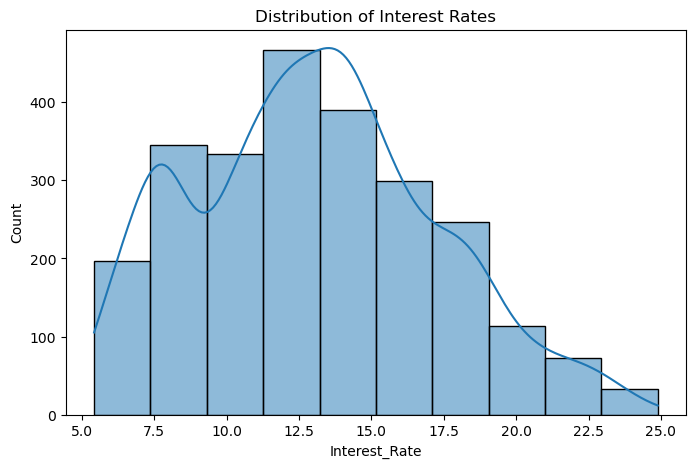

In [82]:
# Interest Rate Distribution
plt.figure(figsize=(8,5))
sns.histplot(data['Interest_Rate'], bins=10, kde=True)
plt.title("Distribution of Interest Rates")
plt.show()

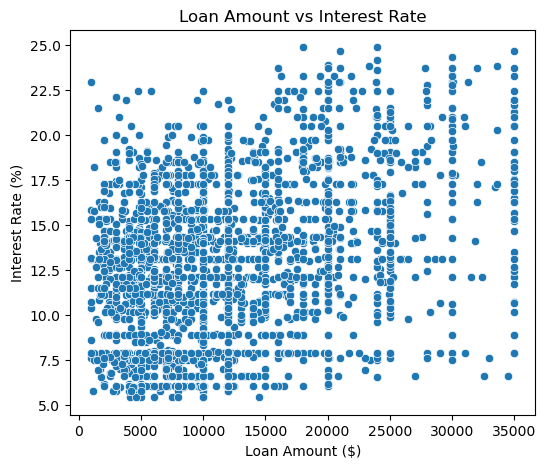

In [83]:
plt.figure(figsize=(6,5))
sns.scatterplot(x=data['Amount_Requested'], y=data['Interest_Rate'])
plt.title("Loan Amount vs Interest Rate")
plt.xlabel("Loan Amount ($)")
plt.ylabel("Interest Rate (%)")
plt.show()

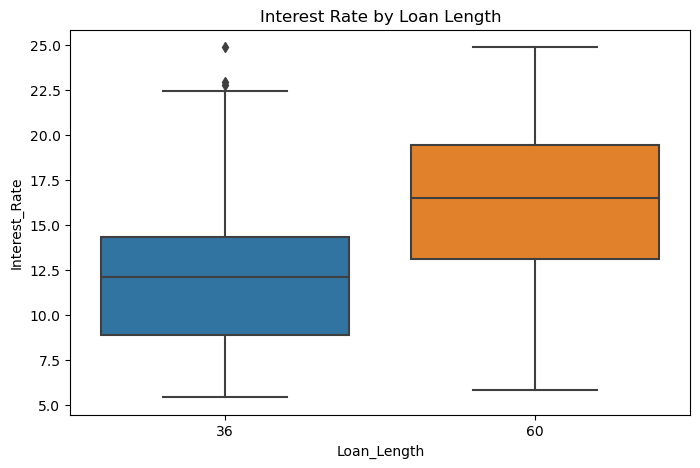

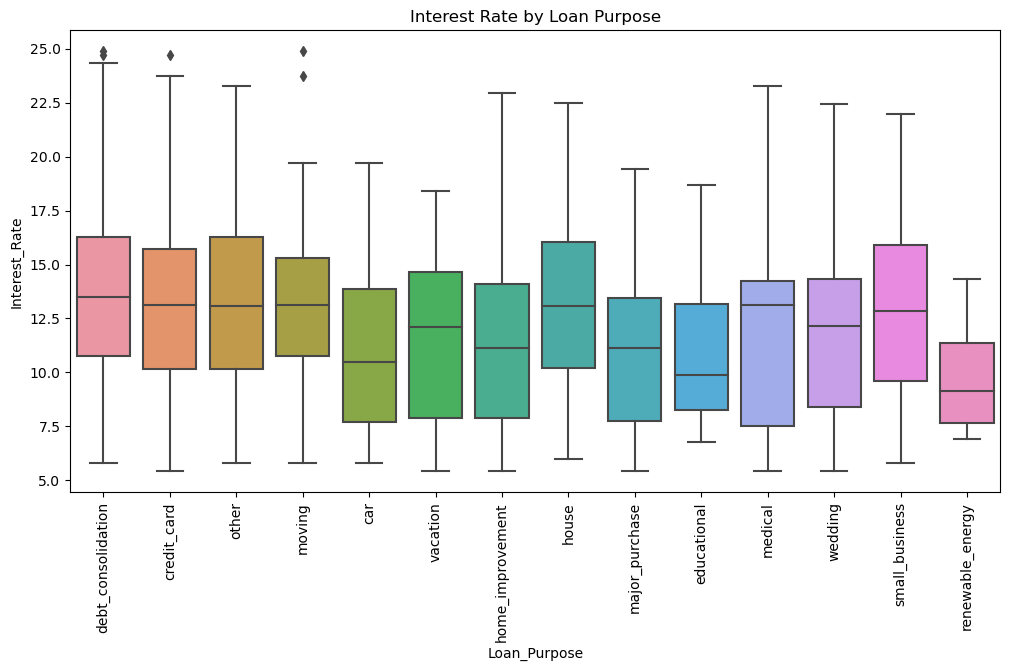

In [77]:
plt.figure(figsize=(8,5))
sns.boxplot(x=data['Loan_Length'], y=data['Interest_Rate'])
plt.title("Interest Rate by Loan Length")
plt.show()

# Boxplot of Interest Rate by Loan Purpose
plt.figure(figsize=(12,6))
sns.boxplot(x=data['Loan_Purpose'], y=data['Interest_Rate'])
plt.xticks(rotation=90)
plt.title("Interest Rate by Loan Purpose")
plt.show()

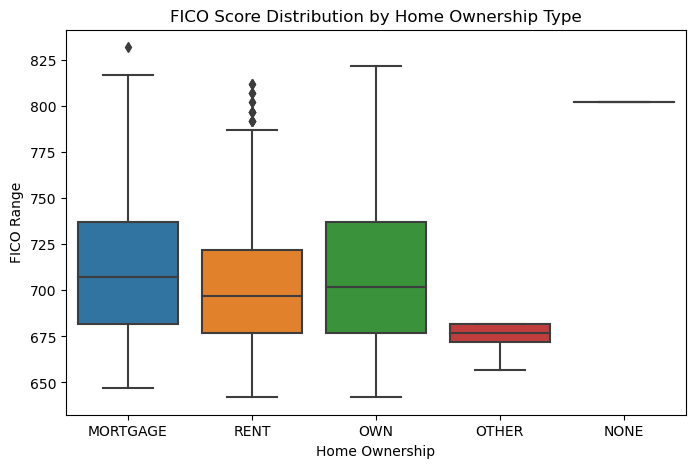

In [78]:
plt.figure(figsize=(8,5))
sns.boxplot(x=data['Home_Ownership'], y=data['FICO_Range'])
plt.title("FICO Score Distribution by Home Ownership Type")
plt.xlabel("Home Ownership")
plt.ylabel("FICO Range")
plt.show()

# HYPOTHESIS TESTING

a) Interest rate is varied for different loan amounts (Less interest charged for high loan).

Defining the Null hypothesis
H0 = Interest rates do not vary significantly with loan amounts.

Alternative Hypothesis
H1 = Larger loan amounts have significantly lower interest rates.


In [85]:
# we are splitting data into 2 sets since we are comparing interest rates for small and large loans

In [86]:
import scipy.stats as stats

median_loan = data['Amount_Requested'].median()

# Split data into two groups
small_loans = data[data['Amount_Requested'] < median_loan]['Interest_Rate'].dropna()
large_loans = data[data['Amount_Requested'] >= median_loan]['Interest_Rate'].dropna()

In [87]:
print(f"Small Loans Count: {len(small_loans)}, Large Loans Count: {len(large_loans)}")

Small Loans Count: 1064, Large Loans Count: 1433


In [88]:
print(f"Mean Interest Rate for Small Loans: {small_loans.mean():.2f}")
print(f"Mean Interest Rate for Large Loans: {large_loans.mean():.2f}")


Mean Interest Rate for Small Loans: 11.96
Mean Interest Rate for Large Loans: 13.89


In [89]:
print(f"Small Loans Std Dev: {small_loans.std()}")
print(f"Large Loans Std Dev: {large_loans.std()}")


Small Loans Std Dev: 3.784630085595618
Large Loans Std Dev: 4.266993346925605


In [90]:
t_stat, p_value = stats.ttest_ind(large_loans, small_loans, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 11.9000
P-value: 0.0000


T-statistic = 11.90 (positive)
This means that the mean interest rate for large loans is significantly higher than for small loans.
P-value = 0.0000 → Since the p-value is extremely low (< 0.05), we reject the null hypothesis. 
This means that loan amount does impact interest rate.

In [91]:
print("Mean Interest Rate for Short-term Loans:", small_loans.mean())
print("Mean Interest Rate for Long-term Loans:", large_loans.mean())


Mean Interest Rate for Short-term Loans: 11.961851503759398
Mean Interest Rate for Long-term Loans: 13.886845778087926


In [92]:

short_term_loans = data[data['Loan_Length'] == 36]['Interest_Rate'].dropna()
long_term_loans = data[data['Loan_Length'] == 60]['Interest_Rate'].dropna()


t_stat, p_value = stats.ttest_ind(large_loans,small_loans, equal_var=False)


print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")


T-statistic: 11.9000
P-value: 0.0000


Positive T-statistic confirms that long-term loans tend to have higher interest rates.
Very low p-value (0.0000) means this result is statistically significant, so we reject the null hypothesis

In [93]:
data_clean = data[['Loan_Purpose', 'Interest_Rate']].dropna()

loan_purpose_groups = [group['Interest_Rate'].values for _, group in data_clean.groupby('Loan_Purpose')]

# Perform One-way ANOVA (only if at least two groups have data)
if len(loan_purpose_groups) > 1:
    f_stat, p_value = stats.f_oneway(*loan_purpose_groups)
    print(f"F-statistic: {f_stat:.4f}")
    print(f"P-value: {p_value:.4f}")


F-statistic: 7.4960
P-value: 0.0000


since we have more categories in loan purpose we will perform Tukey HSD test to see which loan purposes have significant differences

In [94]:
data['Loan_Purpose'] = data['Loan_Purpose'].astype('category')

In [96]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(data['Interest_Rate'], data['Loan_Purpose'])
print(tukey)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1             group2       meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------------------
               car        credit_card   1.9377 0.0897  -0.1201  3.9954  False
               car debt_consolidation   2.4766 0.0024    0.489  4.4642   True
               car        educational  -0.1057    1.0  -4.1662  3.9548  False
               car   home_improvement   0.4813    1.0  -1.7674  2.7299  False
               car              house    2.335 0.6675  -1.3142  5.9842  False
               car     major_purchase  -0.3152    1.0  -2.7002  2.0699  False
               car            medical   0.5367    1.0  -2.6486   3.722  False
               car             moving    2.508 0.3309  -0.7114  5.7275  False
               car              other   2.0466  0.092  -0.1332  4.2263  False
               car   renewable_energy  -1.2355    1.0  -8.4024  

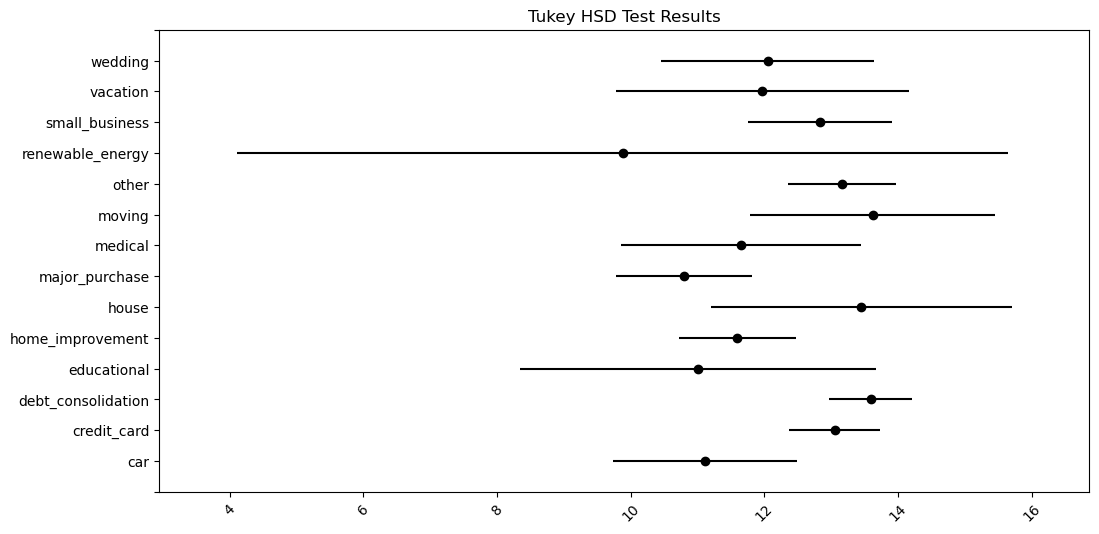

In [97]:
tukey = pairwise_tukeyhsd(endog=data['Interest_Rate'], groups=data['Loan_Purpose'], alpha=0.05)
fig = tukey.plot_simultaneous(figsize=(12, 6))  
plt.xticks(rotation=45)
plt.title("Tukey HSD Test Results")
plt.show()

Reject = True → Statistically significant difference in interest rates between the two loan purposes.
Reject = False → No significant difference in interest rates between the two groups.

and hence we reject null hypothesis since several pairwise comparisons show significant differences.This means that loan purpose does influence interest rates in at least some cases.

d) There is relationship between FICO scores and Home Ownership. 
Null Hypothesis (H₀): There is no significant relationship between FICO scores and Home Ownership.
Alternative Hypothesis (H₁): There is a significant relationship between FICO scores and Home Ownership.

In [100]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(data['FICO_Range'], data['Home_Ownership'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

Chi-Square Statistic: 473.0886940445463
P-value: 1.1871568381123847e-35


Since p < 0.05, we reject the null hypothesis and conclude that:
There is a significant relationship between FICO scores and Home Ownership.
This means that homeownership status is not independent of FICO scores, and people's credit scores may influence their ability to own a home.